In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# font 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
font_list = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
font_list[:10]
# 'Nanum'이라는 단어가 포함된 글꼴 출력
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
# 전역글꼴설정 1
plt.rcParams["font.family"] = 'NanumSquare Neo'

429


In [ ]:
# 3. 뉴욕 바이크 대여 기록 데이터

In [4]:
df_bike = pd.read_csv("https://raw.githubusercontent.com/BokyungChoi/teaching_in_GrowthHackers/refs/heads/master/Session%2003.%20EDA%20%26%20Data%20Visualization/nyc_citibike.csv")
# df_titanic.tail()
df_bike.tail(2).T # 특성, feature, 칼럼 확인

,72033,72034
start_date,2018-05-01,2018-05-01
end_date,2018-05-01,2018-05-01
start_hour,22,23
end_hour,23,23
trip_duration,427,417
start_station_id,379,445
start_station_name,W 31 St & 7 Ave,E 10 St & Avenue A
start_station_latitude,40.749156,40.727408
start_station_longitude,-73.9916,-73.98142
end_station_id,477,285


In [70]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_date               72035 non-null  object 
 1   end_date                 72035 non-null  object 
 2   start_hour               72035 non-null  int64  
 3   end_hour                 72035 non-null  int64  
 4   trip_duration            72035 non-null  int64  
 5   start_station_id         72035 non-null  int64  
 6   start_station_name       72035 non-null  object 
 7   start_station_latitude   72035 non-null  float64
 8   start_station_longitude  72035 non-null  float64
 9   end_station_id           72035 non-null  int64  
 10  end_station_name         72035 non-null  object 
 11  end_station_latitude     72035 non-null  float64
 12  end_station_longitude    72035 non-null  float64
 13  bike_id                  72035 non-null  int64  
 14  usertype              

In [9]:
df_bike.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [ ]:
df_bike.columns
['start_date', 'end_date', 'start_hour', 'end_hour', 'trip_duration',
         'start_station_latitude',
       'start_station_longitude',  
       'end_station_latitude', 'end_station_longitude', ]

# 범주형
'gender', 'start_station_name', 'end_station_name', 'usertype'
# 연속형
'birth_year', 'day_since_register'

Index(['start_date', 'end_date', 'start_hour', 'end_hour', 'trip_duration',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'usertype',
       'birth_year', 'gender', 'day_since_register'],
      dtype='object')

In [ ]:
# 확인해보고싶은 정보 
# 'gender' -> 'usertype' 비율 ?
# 위도 경도로 시작, 종료 거리 확인 
# 시작역 별 'gender'

In [ ]:
# 2. 단일 변수 분석 

In [71]:
df_bike.describe(include='O')

,start_date,end_date,start_station_name,end_station_name,usertype,gender
count,72035,72035,72035,72035,72035,72035
unique,1,9,749,752,2,3
top,2018-05-01,2018-05-01,Pershing Square North,Pershing Square North,Subscriber,male
freq,72035,71821,759,750,63737,48310


In [ ]:
df_bike['trip_duration'].describe()

count    7.203500e+04
mean     1.046751e+03
std      8.139700e+03
min      6.100000e+01
25%      3.980000e+02
50%      6.810000e+02
75%      1.201000e+03
max      1.344462e+06
Name: trip_duration, dtype: float64

In [ ]:
df_bike[['usertype','trip_duration']].groupby(['usertype']).mean()

,trip_duration
usertype,
Subscriber,1046.751052


In [28]:
df_bike[['usertype','trip_duration']].groupby(['usertype']).median()

,trip_duration
usertype,
Subscriber,681.0


In [32]:
df_bike[['gender','trip_duration']].groupby(['gender']).mean()

,trip_duration
gender,
female,1056.671113
male,909.076899
unknown,1953.092078


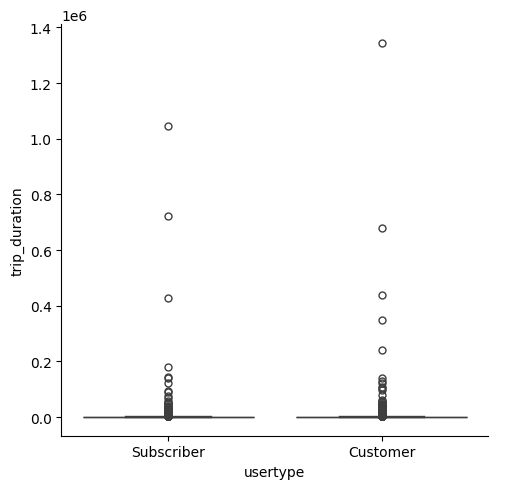

In [78]:
sns.catplot(x='usertype', y = 'trip_duration', data=df_bike, kind = 'box')

In [5]:
q1 = df_bike['trip_duration'].quantile(0.25)
q3 = df_bike['trip_duration'].quantile(0.75)
IQR = q3 - q1
IQR


np.float64(803.0)

In [6]:
df_bike_clean = df_bike[
    ~((df_bike['trip_duration'] > q3 + 1.5 * IQR) | 
    (df_bike['trip_duration'] < q1 - 1.5 * IQR))
]


In [7]:
len(df_bike_clean)

69255

In [8]:
df_bike_clean['trip_duration'].max()

np.int64(2405)

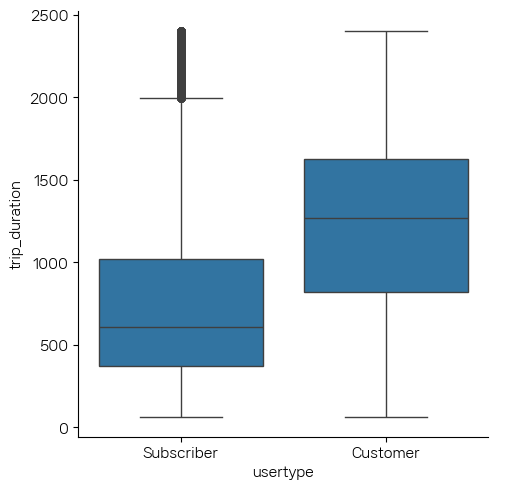

In [9]:
sns.catplot(x='usertype', y = 'trip_duration', data=df_bike_clean, kind = 'box')

In [ ]:
# 여행기간이 뭐 음 각 다 다른거지 뭐 < 해석 

In [ ]:
# - start_hour

In [ ]:
# sns.catplot(x='start_hour', data=df_bike, kind='count')

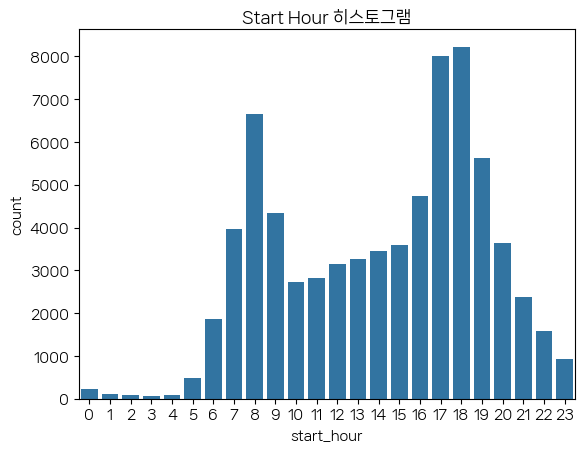

In [ ]:
sns.countplot(x='start_hour', data=df_bike)
plt.title('Start Hour 히스토그램')
plt.show()

In [ ]:
# 저녁 5~6시, 아침 8시가 가장 많은걸로 봐서는 
# 출퇴근 시간에 사람들이 많이 대여하는 것으로 볼 수 있음

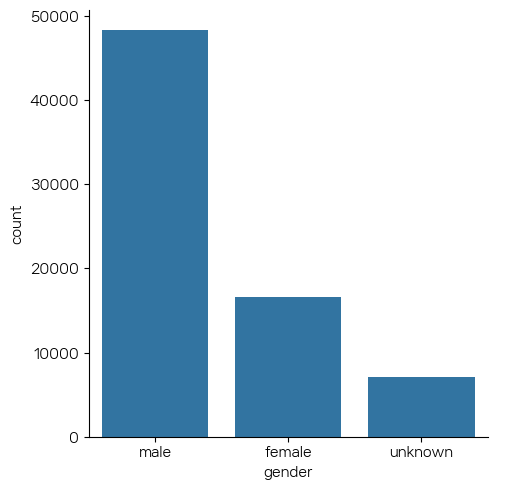

In [19]:
# -gender에 따른 빈도 분포 
sns.catplot(x='gender', data=df_bike, kind='count')

In [ ]:
# 남자가 여자보다 2배 이상 많이 사용함 

In [ ]:
# 3. 이진 변수 분석
# -usertype과 gender 간의 관계를 시각화 

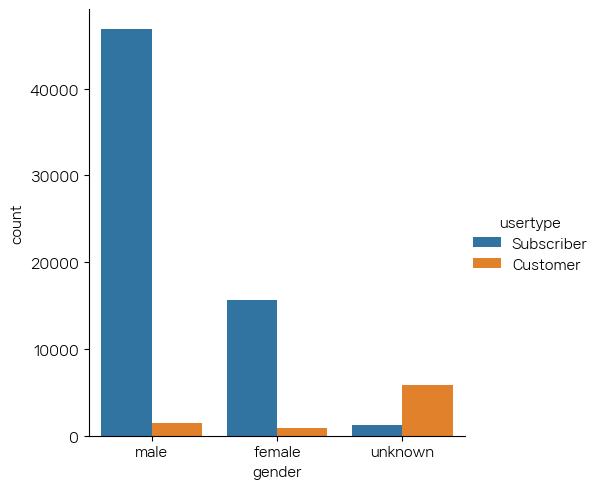

In [20]:
sns.catplot(x='gender', hue='usertype',data=df_bike, kind='count')

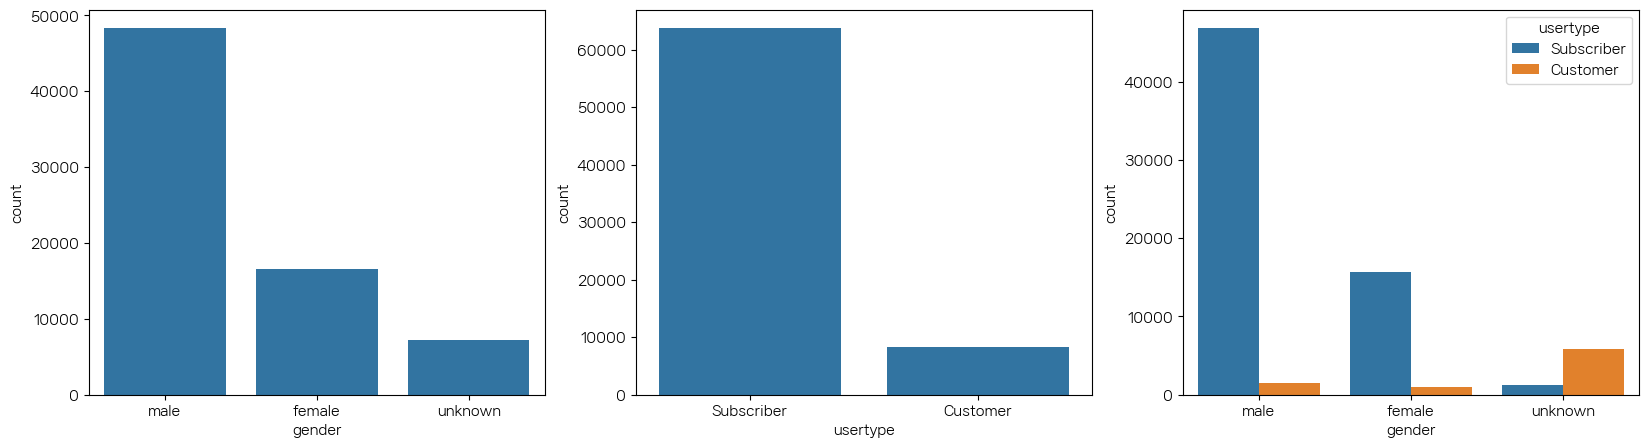

In [30]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.countplot(x='gender', data=df_bike)
plt.subplot(1,3,2)
sns.countplot(x='usertype', data=df_bike)
plt.subplot(1,3,3)
sns.countplot(x='gender', hue='usertype', data=df_bike)
plt.show()

In [ ]:
# 구독해서 사용하는 사람이 가장 많음 
# 남자 여자 성비는 비슷

In [ ]:
# 4. 다변수 분석 

In [ ]:
# 어떤 시작 지점에서 어떤 시간대에 주행시간이 긴지 분석해보세요. 

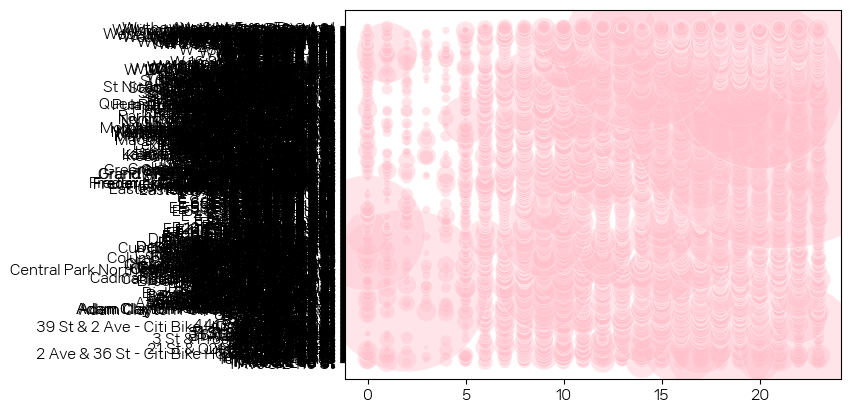

In [36]:
bubble_df = df_bike.groupby(['start_station_name','start_hour'])['trip_duration'].mean().reset_index()
plt.scatter(
    x=bubble_df['start_hour'],
    y=bubble_df['start_station_name'],
    s=bubble_df['trip_duration']/10,  # 버블 크기 조정 (너무 크면 나눠줌)
    alpha=0.4,
    color='pink',
    edgecolors='w',
    linewidth=0.5
)
plt.show()